<a href="https://colab.research.google.com/github/neelsoumya/ai_autograder_project/blob/main/AI_autograder_analysis_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Script to analyze AI autograder data

Loads the evaluation_set.csv file and produces basic summary statistics:
  - Histograms and boxplots for rater_score and automarker_score
  - Counts of essays by rater_cefr_level and by automarker_cefr_level
  - Counts of pass/fail by rater and by automarker
  - Histogram of automarker_confidence


In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/AI_autograder_task')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data munging

In [40]:
# --- Configuration ---
CSV_PATH = "evaluation_set.csv"
OUTPUT_DIR = "summary_outputs"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load Data
df = pd.read_csv(CSV_PATH)

# Verify Required Columns Exist
required_columns = [
    "rater_score",
    "automarker_score",
    "rater_cefr_level",
    "automarker_cefr_level",
    "rater_pass_fail",
    "automarker_pass_fail",
    "automarker_confidence",
]
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in CSV: {missing_cols}")



More data visualization

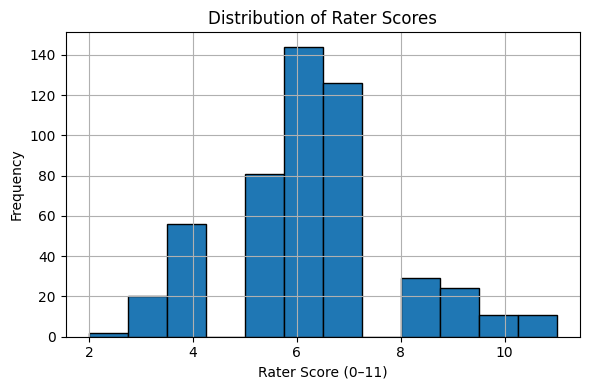

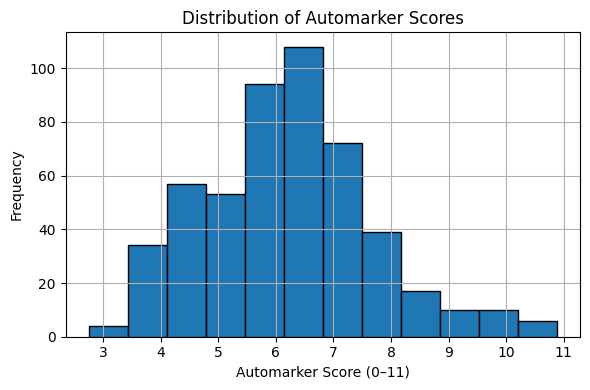

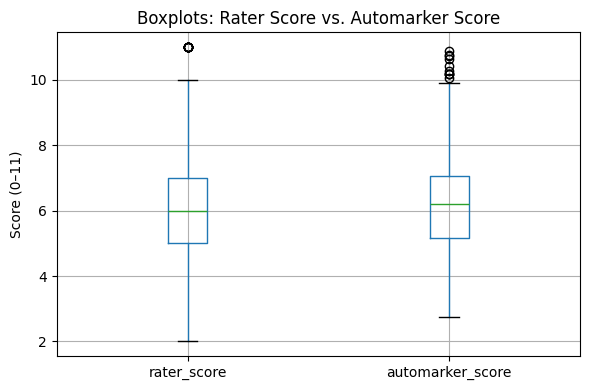

Count of essays by rater_cefr_level:
rater_cefr_level
A1      2
A2     76
B1    225
B2    155
C1     35
C2     11

Count of essays by automarker_cefr_level:
automarker_cefr_level
A2     74
B1    223
B2    169
C1     34
C2      4



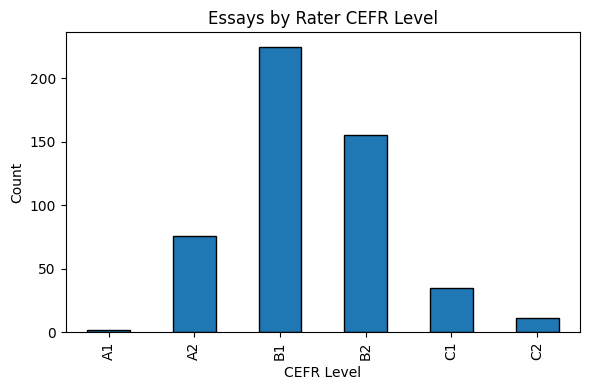

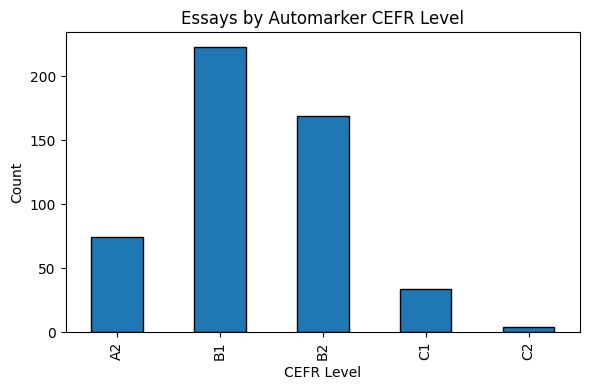

Count of pass/fail by rater:
rater_pass_fail
fail     78
pass    426

Count of pass/fail by automarker:
automarker_pass_fail
fail     74
pass    430



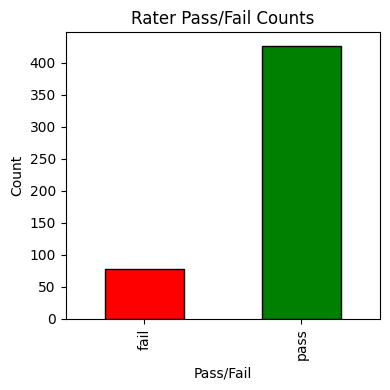

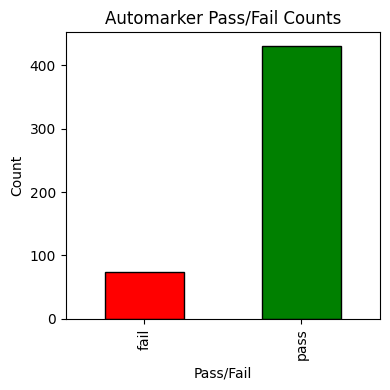

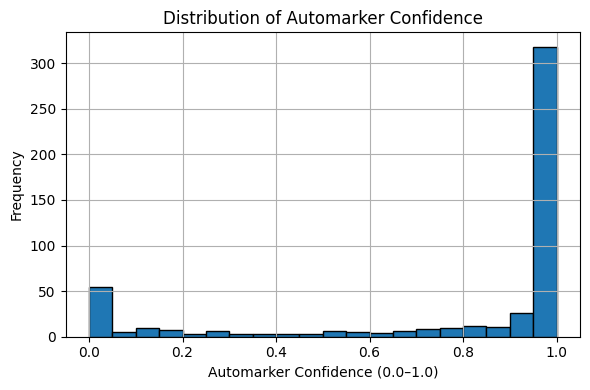

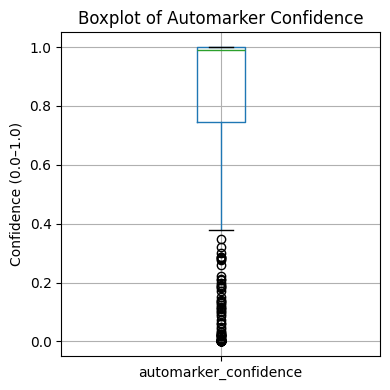

Summary statistics for automarker_confidence:
count    5.040000e+02
mean     7.856701e-01
std      3.522834e-01
min      7.367522e-12
25%      7.455148e-01
50%      9.903444e-01
75%      9.993879e-01
max      9.999990e-01
Name: automarker_confidence, dtype: float64

Script completed. All plots and CSV summaries saved to the 'summary_outputs' directory.


In [41]:

# 1a. Histogram of rater_score
plt.figure(figsize=(6, 4))
df["rater_score"].hist(bins=12, edgecolor="black")
plt.title("Distribution of Rater Scores")
plt.xlabel("Rater Score (0–11)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "rater_score_histogram.png"))
plt.show()
plt.close()


# 1b. Histogram of automarker_score
plt.figure(figsize=(6, 4))
df["automarker_score"].hist(bins=12, edgecolor="black")
plt.title("Distribution of Automarker Scores")
plt.xlabel("Automarker Score (0–11)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "automarker_score_histogram.png"))
plt.show()
plt.close()

# 1c. Boxplot of rater_score vs. automarker_score side by side
plt.figure(figsize=(6, 4))
df[["rater_score", "automarker_score"]].boxplot()
plt.title("Boxplots: Rater Score vs. Automarker Score")
plt.ylabel("Score (0–11)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "score_boxplots.png"))
plt.show()
plt.close()

# Count of Essays by CEFR Level

# 2a. Count by rater_cefr_level
rater_cefr_counts = df["rater_cefr_level"].value_counts().sort_index()
print("Count of essays by rater_cefr_level:")
print(rater_cefr_counts.to_string())
print()

# Save to CSV
rater_cefr_counts.to_csv(os.path.join(OUTPUT_DIR, "rater_cefr_counts.csv"), header=["count"])

# 2b. Count by automarker_cefr_level
automarker_cefr_counts = df["automarker_cefr_level"].value_counts().sort_index()
print("Count of essays by automarker_cefr_level:")
print(automarker_cefr_counts.to_string())
print()

# Save to CSV
automarker_cefr_counts.to_csv(
    os.path.join(OUTPUT_DIR, "automarker_cefr_counts.csv"), header=["count"]
)

# Bar plots for CEFR counts
plt.figure(figsize=(6, 4))
rater_cefr_counts.plot(kind="bar", edgecolor="black")
plt.title("Essays by Rater CEFR Level")
plt.xlabel("CEFR Level")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "rater_cefr_bar.png"))
plt.show()
plt.close()

plt.figure(figsize=(6, 4))
automarker_cefr_counts.plot(kind="bar", edgecolor="black")
plt.title("Essays by Automarker CEFR Level")
plt.xlabel("CEFR Level")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "automarker_cefr_bar.png"))
plt.show()
plt.close()

# Count of Pass/Fail by Rater and Automarker

# 3a. Count by rater_pass_fail
rater_pf_counts = df["rater_pass_fail"].value_counts().sort_index()
print("Count of pass/fail by rater:")
print(rater_pf_counts.to_string())
print()

# Save to CSV
rater_pf_counts.to_csv(os.path.join(OUTPUT_DIR, "rater_pass_fail_counts.csv"), header=["count"])

# 3b. Count by automarker_pass_fail
automarker_pf_counts = df["automarker_pass_fail"].value_counts().sort_index()
print("Count of pass/fail by automarker:")
print(automarker_pf_counts.to_string())
print()

# Save to CSV
automarker_pf_counts.to_csv(
    os.path.join(OUTPUT_DIR, "automarker_pass_fail_counts.csv"), header=["count"]
)

# Optional bar plots for pass/fail
plt.figure(figsize=(4, 4))
rater_pf_counts.plot(kind="bar", color=["red", "green"], edgecolor="black")
plt.title("Rater Pass/Fail Counts")
plt.xlabel("Pass/Fail")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "rater_pass_fail_bar.png"))
plt.show()
plt.close()

plt.figure(figsize=(4, 4))
automarker_pf_counts.plot(kind="bar", color=["red", "green"], edgecolor="black")
plt.title("Automarker Pass/Fail Counts")
plt.xlabel("Pass/Fail")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "automarker_pass_fail_bar.png"))
plt.show()
plt.close()

# Distribution of Automarker Confidence

plt.figure(figsize=(6, 4))
df["automarker_confidence"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Automarker Confidence")
plt.xlabel("Automarker Confidence (0.0–1.0)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "automarker_confidence_histogram.png"))
plt.show()
plt.close()

# boxplot for confidence
plt.figure(figsize=(4, 4))
df[["automarker_confidence"]].boxplot()
plt.title("Boxplot of Automarker Confidence")
plt.ylabel("Confidence (0.0–1.0)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "automarker_confidence_boxplot.png"))
plt.show()
plt.close()

# Summarize in Console
print("Summary statistics for automarker_confidence:")
print(df["automarker_confidence"].describe())
print()

print("Script completed. All plots and CSV summaries saved to the 'summary_outputs' directory.")


How many low confidence ratings were given by the autograder?

In [42]:
low_confidence_threshold = 0.8
low_confidence_ratings = df[df['automarker_confidence'] < low_confidence_threshold]
num_low_confidence = len(low_confidence_ratings)

print(f"Number of low confidence ratings (< {low_confidence_threshold}): {num_low_confidence}")


total_examinees = len(df)

fraction_low_confidence = num_low_confidence / total_examinees

print(f"Fraction of examinees with low confidence ratings (< {low_confidence_threshold}): {fraction_low_confidence:.4f}")

Number of low confidence ratings (< 0.8): 137
Fraction of examinees with low confidence ratings (< 0.8): 0.2718


How many of these low confidence ratings led to a fail

In [43]:
# Define low confidence threshold
threshold = 0.8

# Filter essays with low confidence
low_conf_df = df[df['automarker_confidence'] < threshold]

# Count how many of these low-confidence essays were marked as 'fail' by the automarker
low_conf_fail_count = (low_conf_df['automarker_pass_fail'] == 'fail').sum()

# Total number of low-confidence essays
low_conf_total = len(low_conf_df)

# Compute fraction (and percentage)
if low_conf_total > 0:
    fraction_fail = low_conf_fail_count / low_conf_total
    percentage_fail = fraction_fail * 100
else:
    fraction_fail = 0
    percentage_fail = 0

# Print results
print(f"Low-confidence essays (< {threshold}): {low_conf_total}")
print(f"Of those, automarker marked {low_conf_fail_count} as 'fail'")
print(f"Fraction of low-confidence essays that failed: {fraction_fail:.3f} ({percentage_fail:.1f}%)")


Low-confidence essays (< 0.8): 137
Of those, automarker marked 17 as 'fail'
Fraction of low-confidence essays that failed: 0.124 (12.4%)


How many of these were actually fail (as determined by human rater)

In [44]:
# Define low confidence threshold
threshold = 0.8

# Filter essays with low confidence that the automarker predicted as 'fail'
low_conf_autofail_df = df[
    (df['automarker_confidence'] < threshold) &
    (df['automarker_pass_fail'] == 'fail')
]

# Count how many of these were actually 'fail' according to the human rater
true_fail_count = (low_conf_autofail_df['rater_pass_fail'] == 'fail').sum()

# Total number of low-confidence essays predicted 'fail' by the automarker
autofail_total = len(low_conf_autofail_df)

# Print results
print(f"Low-confidence essays (< {threshold}) predicted 'fail' by automarker: {autofail_total}")
print(f"Among these, human rater marked {true_fail_count} as 'fail'")


Low-confidence essays (< 0.8) predicted 'fail' by automarker: 17
Among these, human rater marked 9 as 'fail'


Of those predicted by  predicted to fail, how many actually failed (as rated by a human)


Sensitivity and specificity (assuming human rater is ground truth)

In [45]:

# Define human rater as ground truth
# Define "fail" as the positive class
# true positives (TP): automarker predicts 'fail' and rater is 'fail'
# false negatives (FN): automarker predicts 'pass' but rater is 'fail'
# false positives (FP): automarker predicts 'fail' but rater is 'pass'
# true negatives (TN): automarker predicts 'pass' and rater is 'pass'

# Boolean masks
auto_fail = df['automarker_pass_fail'] == 'fail'
auto_pass = df['automarker_pass_fail'] == 'pass'
rater_fail = df['rater_pass_fail'] == 'fail'
rater_pass = df['rater_pass_fail'] == 'pass'

# Compute counts
TP = ((auto_fail) & (rater_fail)).sum()
FN = ((auto_pass) & (rater_fail)).sum()
FP = ((auto_fail) & (rater_pass)).sum()
TN = ((auto_pass) & (rater_pass)).sum()

# Compute sensitivity and specificity
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else float('nan')
specificity = TN / (TN + FP) if (TN + FP) > 0 else float('nan')

# Print confusion matrix and metrics
print("Confusion Matrix (positive='fail'):")
print(f"TP (predicted fail & actually fail): {TP}")
print(f"FN (predicted pass & actually fail): {FN}")
print(f"FP (predicted fail & actually pass): {FP}")
print(f"TN (predicted pass & actually pass): {TN}")
print()
print(f"Sensitivity (True Positive Rate) = TP / (TP + FN): {sensitivity:.3f}")
print(f"Specificity (True Negative Rate) = TN / (TN + FP): {specificity:.3f}")


Confusion Matrix (positive='fail'):
TP (predicted fail & actually fail): 57
FN (predicted pass & actually fail): 21
FP (predicted fail & actually pass): 17
TN (predicted pass & actually pass): 409

Sensitivity (True Positive Rate) = TP / (TP + FN): 0.731
Specificity (True Negative Rate) = TN / (TN + FP): 0.960


Cost analysis (hypothetical scenario)

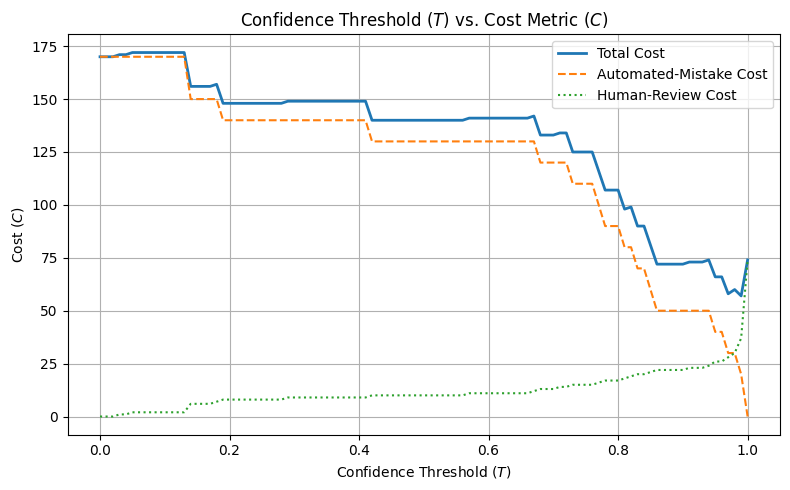

In [46]:
# Filter to essays where automarker predicts ‘fail’
auto_fail_df = df[df["automarker_pass_fail"] == "fail"].copy()

# Define cost parameters (adjust as needed)
cost_human = 1        # cost of sending one essay to a human rater
cost_miss_fail = 10   # cost when automarker says fail but human would say pass

# Set up a grid of thresholds between 0 and 1
thresholds = np.linspace(0, 1, 101)

# Lists to accumulate cost values
total_costs = []
cost_auto_list = []
cost_human_list = []

for T in thresholds:
    # 1) Automated-only fails (confidence >= T)
    high_conf = auto_fail_df[auto_fail_df["automarker_confidence"] >= T]
    # Among these, count how many are false positives (rater says pass)
    false_positives = high_conf[high_conf["rater_pass_fail"] == "pass"]
    cost_auto = cost_miss_fail * len(false_positives)

    # 2) Triaged essays (confidence < T) go to humans
    triaged = auto_fail_df[auto_fail_df["automarker_confidence"] < T]
    cost_human_total = cost_human * len(triaged)

    total_cost = cost_auto + cost_human_total

    total_costs.append(total_cost)
    cost_auto_list.append(cost_auto)
    cost_human_list.append(cost_human_total)

# Plot the costs as a function of threshold T
plt.figure(figsize=(8, 5))
plt.plot(thresholds, total_costs, label="Total Cost", linewidth=2)
plt.plot(thresholds, cost_auto_list, label="Automated‐Mistake Cost", linestyle="--")
plt.plot(thresholds, cost_human_list, label="Human‐Review Cost", linestyle=":")
plt.xlabel("Confidence Threshold ($T$)")
plt.ylabel("Cost ($C$)")
plt.title("Confidence Threshold ($T$) vs. Cost Metric ($C$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'T_optimization.png') )
plt.show()
plt.close()


Print optimal $T$

In [47]:
# print minimum cost
print(f"Minimum cost:{min(total_costs)}")

# print T corresponding to this min cost
idx_min_cost = total_costs.index(min(total_costs))

optimal_T = thresholds[idx_min_cost]
print(optimal_T)

print(len(total_costs))
print(len(thresholds))

Minimum cost:57
0.99
101
101
